In [13]:
from assaytools import platereader
from glob import glob
%matplotlib inline

In [67]:
file_set = {'p38': "2016-11-08 10-57-50_plate_1.xml"}
ligands = ['Staurosporine']

In [15]:
data = platereader.read_icontrol_xml('p38_Sta_ab_20160915_145206.xml')
data.keys()

['em340_Copy2', 'em280_Copy2', 'em340', 'em296_Copy2', 'em280', 'em296']

In [16]:
from lxml import etree
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')
sns.set_context('talk')

In [46]:
#This function allows us to import a section from an xml formated data file and convert itto a pandas dataframe
def xml2df_section(file,section):

    root = etree.parse(file)

    data = []

    reads = root.xpath("/*/Section[%s]/*/Well"%section)
    Sections = root.xpath("/*/Section")
    print Sections[(section-1)].attrib['Name'] 
    section_name = Sections[(section-1)].attrib['Name'] 
    
    wellIDs = [read.attrib['Pos'] for read in reads]

    data = [(s.text, float(s.attrib['WL']), r.attrib['Pos'])
        for r in reads
        for s in r]
    
    dataframe = pd.DataFrame(data, columns=['fluorescence','wavelength (nm)','Well'])
            
    ### dataframe_rep replaces 'OVER' (when fluorescence signal maxes out) with '3289277', an arbitrarily high number

    dataframe_rep = dataframe.replace({'OVER':'3289277'})

    dataframe_rep[['fluorescence']] = dataframe_rep[['fluorescence']].astype('float')
            
    dataframe_pivot = pd.pivot_table(dataframe_rep, index = 'wavelength (nm)', columns = ['Well'])
    
    #Rearrange columns so they're in the right order
    cols =  dataframe_pivot['fluorescence'].columns.tolist()
    cols = [cols[0]] + cols[4:12] + cols[1:4] + [cols[12]] + cols[16:23] + cols[13:16]
    dataframe_reindex =  dataframe_pivot.reindex_axis(cols,level='Well',axis=1)
    
    return [dataframe_reindex,section_name]

In [68]:
#This function allows us to plot spectra
def plot_spectra_grid(file_set,protein,ligands,ligand,section):
    grid = len(protein) + len(ligand)

    file = file_set[protein]
    
    # make a dataframe
    [df,section_name] = xml2df_section(file,section)
    
    # pick a title
    title = "%s - %s: %s" %(protein, ligand, section_name)
    
    # plot the spectra
    fig = plt.figure(figsize=(8,6));
    ax = df['fluorescence'].iloc[:,12].plot(ylim=(0,2000),legend=False, linewidth=4,color='m',title=title);
    #ylim=(0,1000000)
    ax.axvline(x=378,color='0.7',linestyle='--');
    ax.axvline(x=396,color='0.7',linestyle='--');
    for i in range(11):
        #s = df['fluorescence'].iloc[:,i].plot(ylim=(0,100000),linewidth=3,c=cm.hsv(i*15), ax = ax, title=title);
        df['fluorescence'].iloc[:,i].plot(linewidth=3,c=cm.hsv(i*15), ax = ax);
        df['fluorescence'].iloc[:,11+i].plot(legend=False, linewidth=4,c=cm.gray(i*15+50), ax = ax, fontsize =20);
    # ylim=(0,500000)
    sns.despine()
    plt.xlim(280,500)
    #plt.yticks([])
    plt.xlabel('wavelength (nm)', fontsize=20)
    plt.tight_layout();

em280


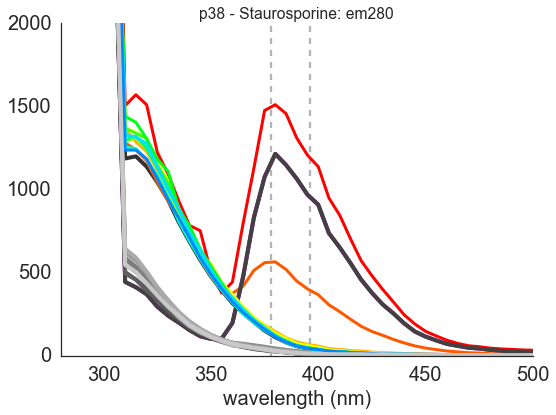

In [69]:
plot_spectra_grid(file_set,'p38',ligands,'Staurosporine',1)

em296


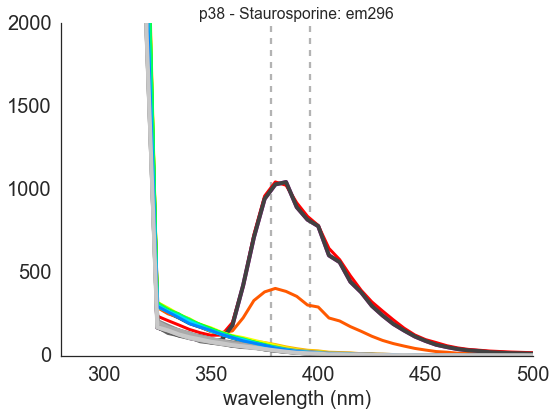

In [70]:
plot_spectra_grid(file_set,'p38',ligands,'Staurosporine',2)

em340


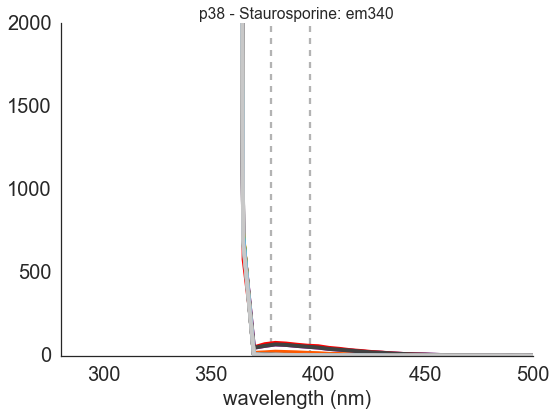

In [71]:
plot_spectra_grid(file_set,'p38',ligands,'Staurosporine',3)

em280_Copy2


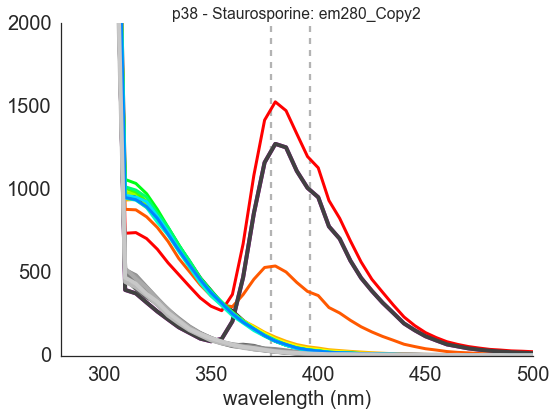

In [72]:
plot_spectra_grid(file_set,'p38',ligands,'Staurosporine',4)

em296_Copy2


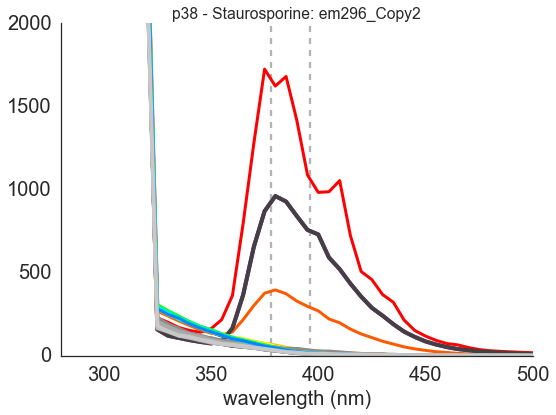

In [73]:
plot_spectra_grid(file_set,'p38',ligands,'Staurosporine',5)

em340_Copy2


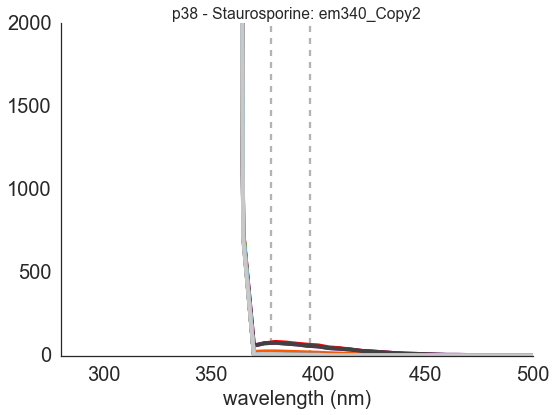

In [74]:
plot_spectra_grid(file_set,'p38',ligands,'Staurosporine',6)

In [64]:
file_set = {'p38-high-gain': "p38_Sta_ab_20160915_145206.xml"}


In [29]:
#This function allows us to import a section from an xml formated data file and convert itto a pandas dataframe
def xml2df_section(file,section):

    root = etree.parse(file)

    data = []

    reads = root.xpath("/*/Section[%s]/*/Well"%section)
    Sections = root.xpath("/*/Section")
    print Sections[(section-1)].attrib['Name'] 
    section_name = Sections[(section-1)].attrib['Name'] 
    
    wellIDs = [read.attrib['Pos'] for read in reads]

    data = [(s.text, float(s.attrib['WL']), r.attrib['Pos'])
        for r in reads
        for s in r]
    
    dataframe = pd.DataFrame(data, columns=['fluorescence','wavelength (nm)','Well'])
            
    ### dataframe_rep replaces 'OVER' (when fluorescence signal maxes out) with '3289277', an arbitrarily high number

    dataframe_rep = dataframe.replace({'OVER':'0'})

    dataframe_rep[['fluorescence']] = dataframe_rep[['fluorescence']].astype('float')
            
    dataframe_pivot = pd.pivot_table(dataframe_rep, index = 'wavelength (nm)', columns = ['Well'])
    
    #Rearrange columns so they're in the right order
    cols =  dataframe_pivot['fluorescence'].columns.tolist()
    cols = [cols[0]] + cols[4:12] + cols[1:4] + [cols[12]] + cols[16:23] + cols[13:16]
    dataframe_reindex =  dataframe_pivot.reindex_axis(cols,level='Well',axis=1)
    
    return [dataframe_reindex,section_name]

In [36]:
#This function allows us to plot spectra
def plot_spectra_grid(file_set,protein,ligands,ligand,section):
    grid = len(protein) + len(ligand)

    file = file_set[protein]
    
    # make a dataframe
    [df,section_name] = xml2df_section(file,section)
    
    # pick a title
    title = "%s - %s: %s" %(protein, ligand, section_name)
    
    # plot the spectra
    fig = plt.figure(figsize=(8,6));
    ax = df['fluorescence'].iloc[:,12].plot(ylim=(0,500000),legend=False, linewidth=4,color='m',title=title);
    #ylim=(0,1000000)
    ax.axvline(x=378,color='0.7',linestyle='--');
    ax.axvline(x=396,color='0.7',linestyle='--');
    for i in range(11):
        #s = df['fluorescence'].iloc[:,i].plot(ylim=(0,100000),linewidth=3,c=cm.hsv(i*15), ax = ax, title=title);
        df['fluorescence'].iloc[:,i].plot(linewidth=3,c=cm.hsv(i*15), ax = ax);
        df['fluorescence'].iloc[:,11+i].plot(legend=False, linewidth=4,c=cm.gray(i*15+50), ax = ax, fontsize =20);
    # ylim=(0,500000)
    #sns.despine()
    plt.xlim(320,600)
    #plt.yticks([])
    plt.xlabel('wavelength (nm)', fontsize=20)
    plt.tight_layout();

em280


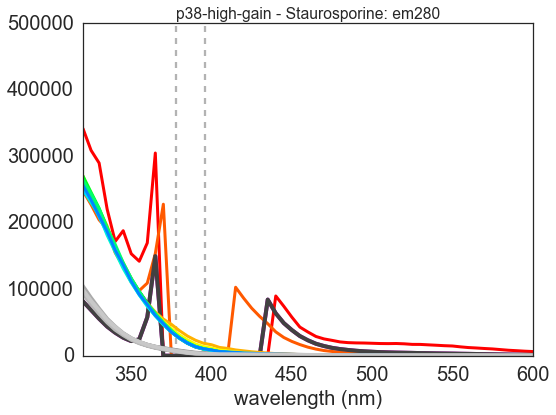

In [37]:
plot_spectra_grid(file_set,'p38-high-gain',ligands,'Staurosporine',1)

em296


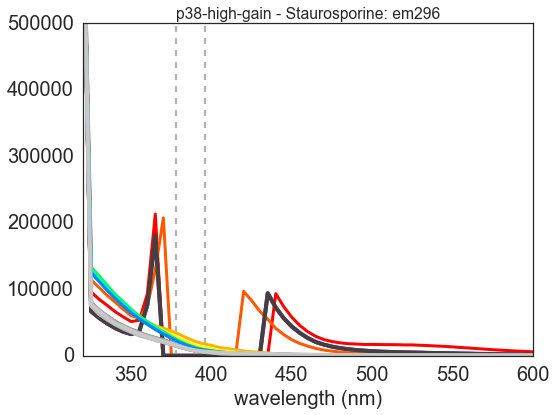

In [38]:
plot_spectra_grid(file_set,'p38-high-gain',ligands,'Staurosporine',2)

em340


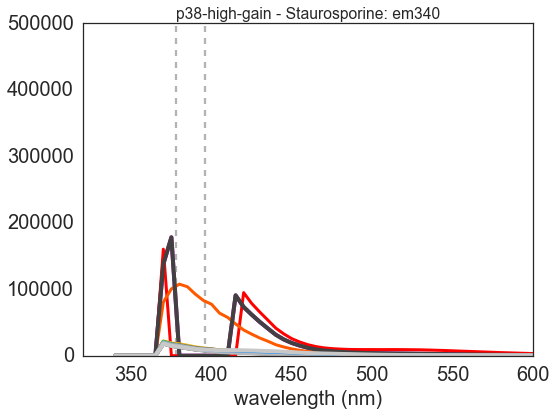

In [39]:
plot_spectra_grid(file_set,'p38-high-gain',ligands,'Staurosporine',3)

em280_Copy2


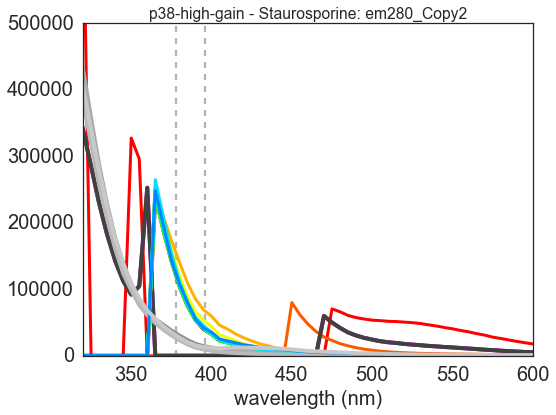

In [40]:
plot_spectra_grid(file_set,'p38-high-gain',ligands,'Staurosporine',4)

em296_Copy2


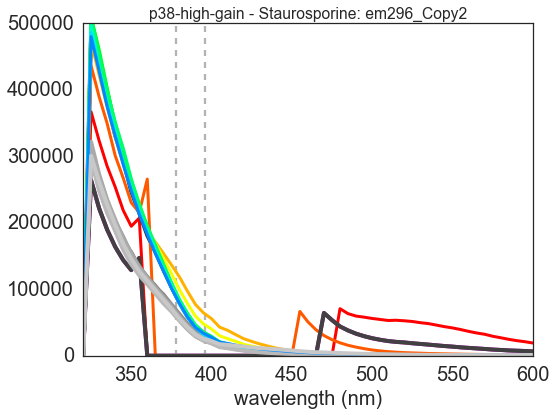

In [41]:
plot_spectra_grid(file_set,'p38-high-gain',ligands,'Staurosporine',5)

In [44]:
#plot_spectra_grid(file_set,'p38-high-gain',ligands,'Staurosporine',6)
#MAYBE THIS DIDN'TFINISH READING

em340_Copy2


IndexError: list index out of range

In [76]:
pwd

u'/Users/hansons/Downloads/Staurosporine'